In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
# !ls ../../Results/Polynomial_experiments/Simple/

In [6]:
simple_metrics = pd.read_csv('../../Results/Polynomial_experiments/Simple/5m_simple_metrics.tsv')

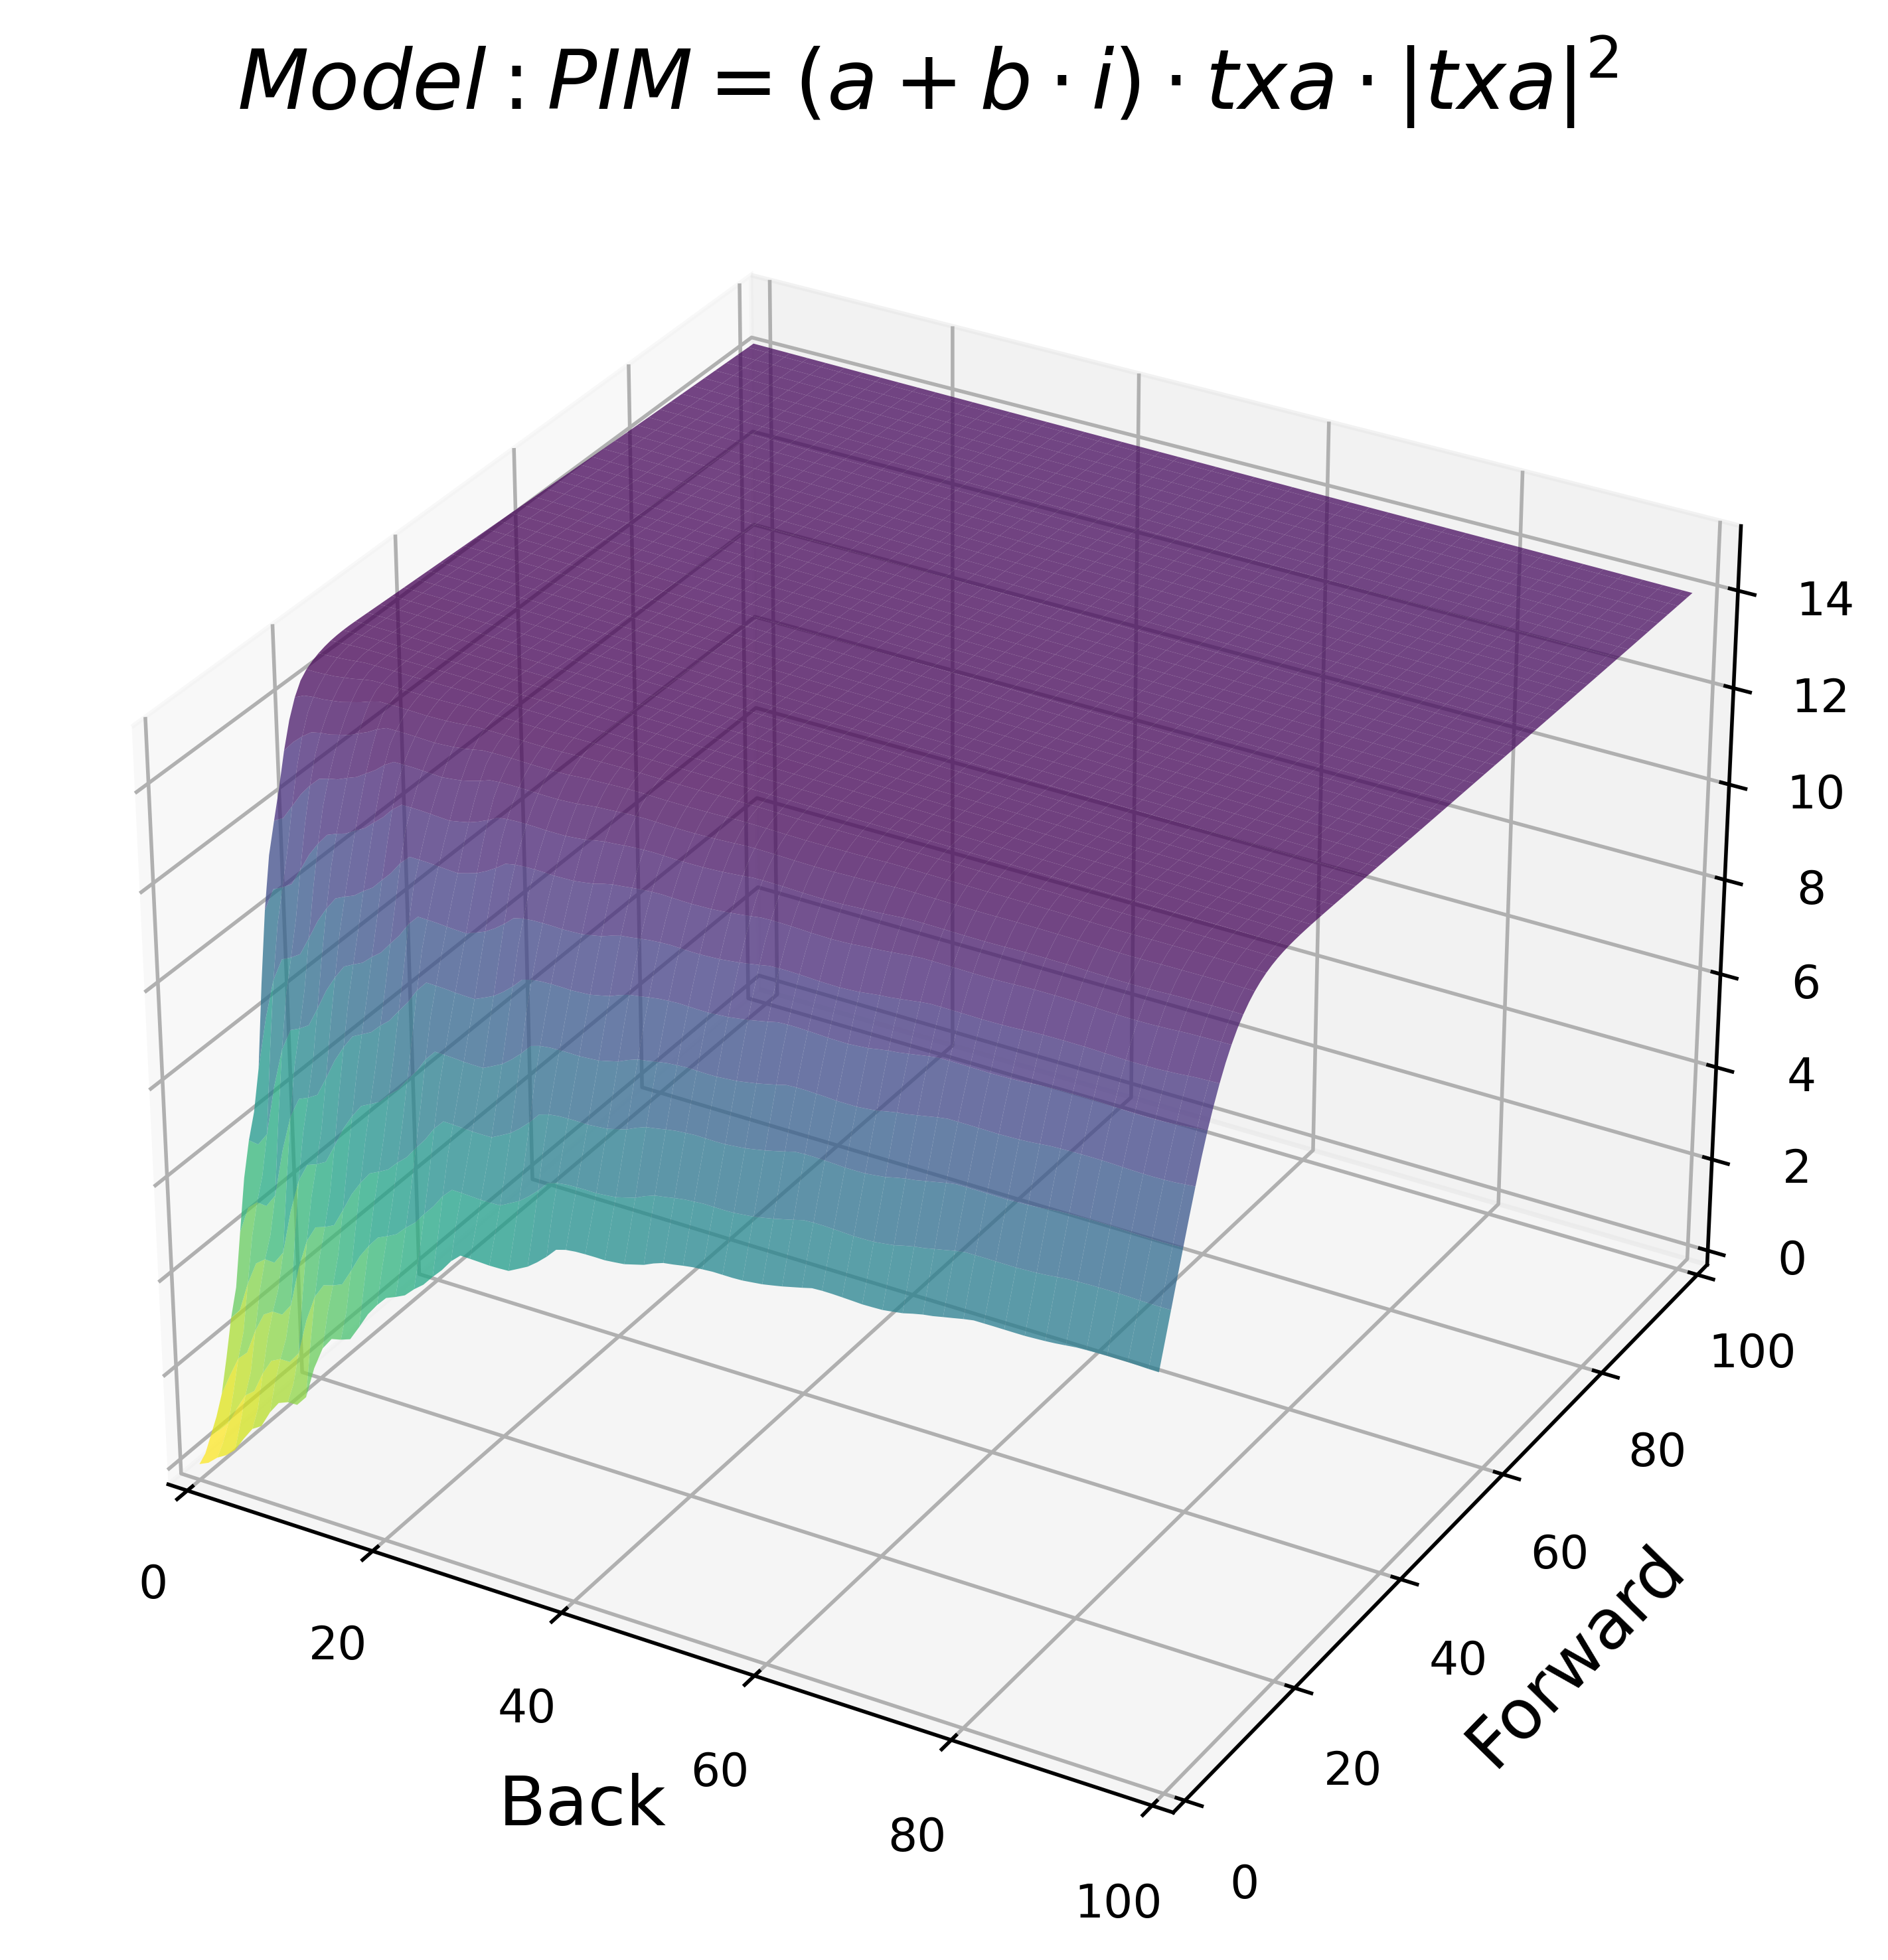

In [43]:
X, Y = np.array(simple_metrics['Back']).reshape(100,100), np.array(simple_metrics['Forward']).reshape(100,100)
metric = np.array(simple_metrics['Test_metric']).reshape(100,100)

# fig = plt.figure(figsize = (16,10))
fig = plt.figure(figsize = (10, 7), dpi=500)
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, metric, cmap='viridis_r', alpha = 0.75)
ax.plot_surface(Y, X, metric, cmap='viridis_r', alpha = 0.75)
ax.set_xlabel('Back', fontsize=15)
ax.set_ylabel('Forward', fontsize=15)
# ax.set_zlabel('\nLoss', fontsize=15)
ax.set_title(r'$Model: PIM = (a + b \cdot i) \cdot txa \cdot |txa|^2$', fontsize=18)

ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_zlim([0,15])
plt.show()


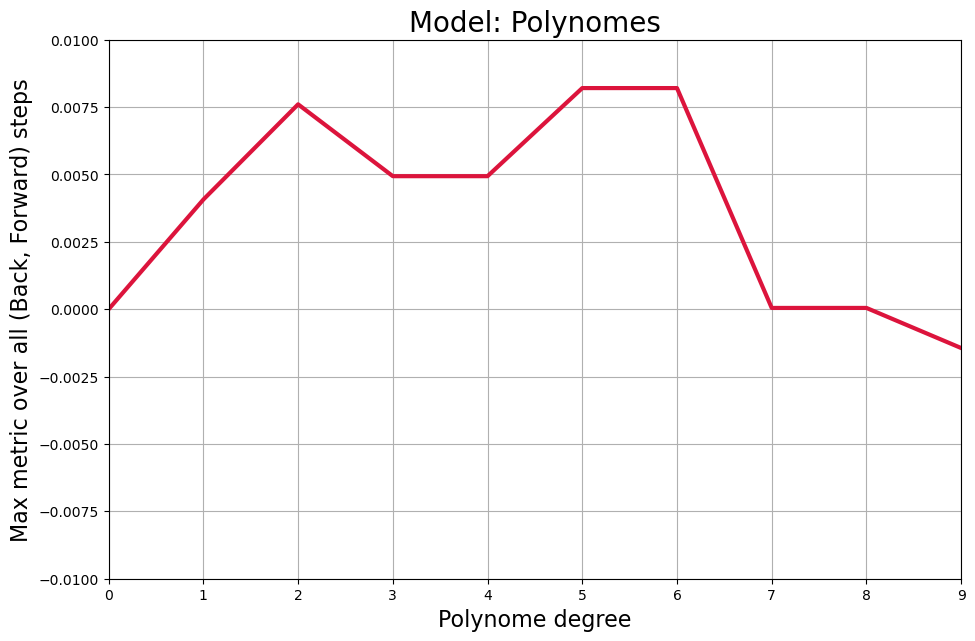

In [49]:
polynomial_metrics = pd.read_csv('../../Results/Polynomial_experiments/Polynomial/5m_polynomial_metrics.tsv')

polynome_degrees = polynomial_metrics.Degree.unique().tolist()
polynome_degrees.sort()
max_polynome_metrics = []
for degree in polynome_degrees:
    max_polynome_metrics.append(max(polynomial_metrics.loc[polynomial_metrics.Degree==degree]['Test_metric']))

fig = plt.figure(figsize = (11,7))
plt.plot(polynome_degrees,max_polynome_metrics, linewidth = 3, color = 'crimson')
plt.xlim([0,9])
plt.ylim([-0.01,0.01])
plt.xlabel('Polynome degree', fontsize=16)
plt.ylabel('Max metric over all (Back, Forward) steps', fontsize=16)
plt.title('Model: Polynomes', fontsize = 20)
plt.grid(True)

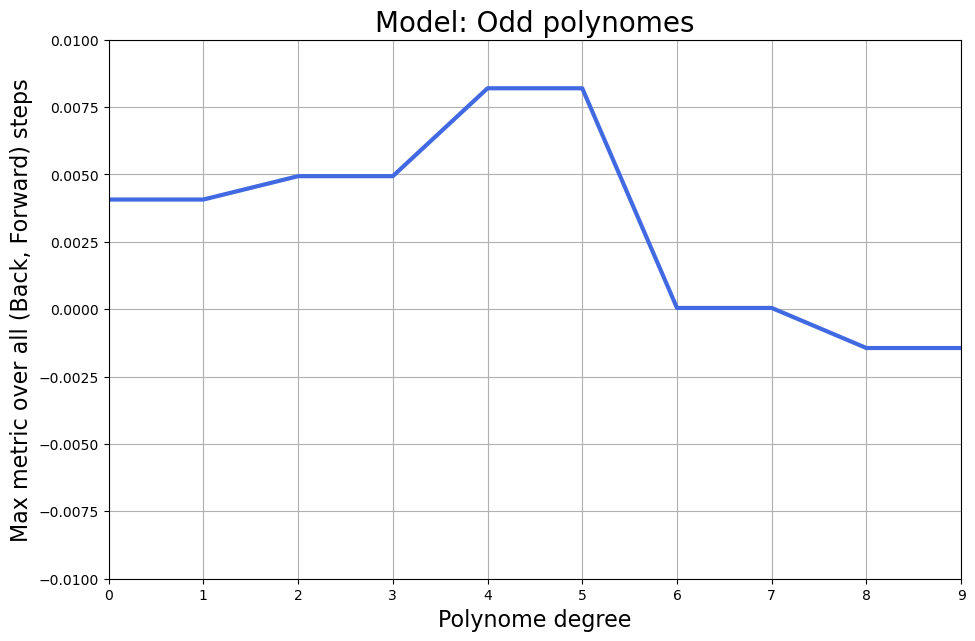

In [51]:
odd_polynomial_metrics = pd.read_csv('../../Results_1/Polynomial_experiments/Odd_polynomial/5m_odd_polynomial_metrics.tsv')

odd_polynome_degrees = odd_polynomial_metrics.Degree.unique().tolist()
odd_polynome_degrees.sort()
odd_max_polynome_metrics = []
for degree in odd_polynome_degrees:
    odd_max_polynome_metrics.append(max(odd_polynomial_metrics.loc[odd_polynomial_metrics.Degree==degree]['Test_metric']))

fig = plt.figure(figsize = (11,7))
plt.plot(odd_polynome_degrees,odd_max_polynome_metrics, linewidth = 3, color = 'royalblue')
plt.xlim([0,9])
plt.ylim([-0.01,0.01])
plt.xlabel('Polynome degree', fontsize=16)
plt.ylabel('Max metric over all (Back, Forward) steps', fontsize=16)
plt.title('Model: Odd polynomes', fontsize = 20)
plt.grid(True)

In [9]:
from scipy.io import loadmat
data = loadmat("../../Data/FOR_COOPERATION/1TR_C20Nc1CD_E20Ne1CD_20250117_5m/1TR_C20Nc1CD_E20Ne1CD_20250117_5m.mat")

FC_TX = data['BANDS_DL'][0][0][0][0][0] / 10**6
FC_RX = data['BANDS_UL'][0][0][0][0][0] / 10**6
FS = data['Fs'][0][0] / 10**6
PIM_SFT = data['PIM_sft'][0][0] / 10**6
PIM_BW = data['BANDS_TX'][0][0][1][0][0] / 10**6
PIM_total_BW = data['BANDS_TX'][0][0][3][0][0] / 10**6

simple_df = pd.read_csv('../../Results/Polynomial_experiments/Simple/simple_experiment__back_28_fwd_15m_experiment.tsv')
rxa = simple_df['Rxa']
filtered = simple_df['Filtered_signal']

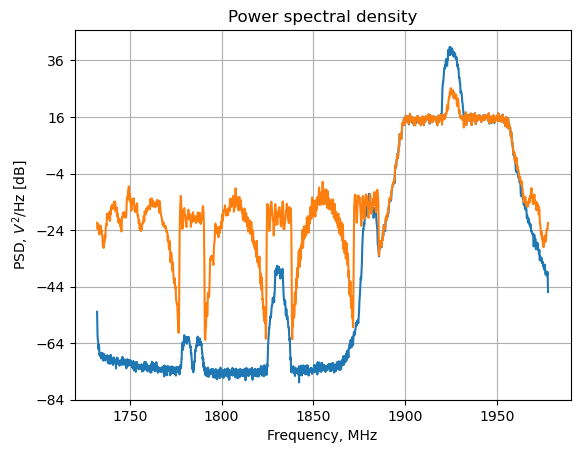

In [25]:
ax = plt.subplot(1,1,1)
psd_RX,f = ax.psd(np.array(rxa, dtype = np.complex_), Fs = FS, Fc = FC_TX, NFFT = 2048, window = np.kaiser(2048,10), noverlap = 1, pad_to = 2048)
psd_NF,f = ax.psd(np.array(filtered, dtype = np.complex_), Fs = FS, Fc = FC_TX, NFFT = 2048, window = np.kaiser(2048,10), noverlap = 1, pad_to = 2048)
ax.set_ylabel(r'PSD, $V^2$/Hz [dB]')
ax.set_xlabel('Frequency, MHz')
ax.set_title('Power spectral density')
plt.show()

In [31]:
sys.path.append('../../Modules/')
from least_squares_models import *
PIM_power = cal_power(np.array(rxa, dtype = np.complex_), FS = FS, FC_TX = FC_TX, PIM_SFT = PIM_SFT, PIM_BW = PIM_BW)
filtered_power = cal_power(np.array(filtered, dtype = np.complex_), FS = FS, FC_TX = FC_TX, PIM_SFT = PIM_SFT, PIM_BW = PIM_BW)

In [35]:
print('PIM level: ', round(PIM_power, 2))
print('Filtered signal level: ',round(filtered_power, 2))

PIM level:  38.39
Filtered signal level:  23.84
